In [1]:
# Libraries for reading and working with multidimensional arrays
import numpy as np
import xarray as xr
import pandas as pd
import datetime

# Libraries to assist with animation and visualisations
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import animation
import cartopy.crs as ccrs
from IPython.display import HTML

In [2]:
file_path = '/glade/scratch/klamb/data_for_Kara/outsdm_iceball_nowind_sgs_sc_rhod_poly_min200/cm1out.nc'
ds = xr.open_dataset(file_path)
ds

<xarray.Dataset>
Dimensions:   (one: 1, time: 75, ni: 120, nip1: 121, nj: 120, njp1: 121,
               nk: 140, nkp1: 141)
Coordinates:
  * time      (time) timedelta64[ns] 01:01:00.000244141 ... 02:15:00.000488281
Dimensions without coordinates: one, ni, nip1, nj, njp1, nk, nkp1
Data variables: (12/43)
    f_cor     (one) float32 ...
    ztop      (one) float32 ...
    xh        (ni) float32 ...
    xf        (nip1) float32 ...
    yh        (nj) float32 ...
    yf        (njp1) float32 ...
    ...        ...
    out10     (time, nk, nj, ni) float32 ...
    out11     (time, nk, nj, ni) float32 ...
    out12     (time, nk, nj, ni) float32 ...
    out13     (time, nk, nj, ni) float32 ...
    out14     (time, nk, nj, ni) float32 ...
    tke       (time, nkp1, nj, ni) float32 ...
Attributes: (12/69)
    cm1 version:  cm1r19.1
    x_units:      km
    x_label:      x
    y_units:      km
    y_label:      y
    z_units:      km
    ...           ...
    cgt1:         1.875
    cgt2:         -1.25
    cgt3:         0.375
    dgt1:         2.0
    dgt2:         -3.0
    dgt3:         1.0

# Scratch

In [39]:
time_array = ds['time'].to_numpy()
time_seconds = time_array / np.timedelta64(1, 's')

In [49]:
print(time_array[0])
print(time_array[1])

3660000244141 nanoseconds
3720000244141 nanoseconds


In [42]:
print(datetime.timedelta(seconds = time_seconds[0]))

1:01:00.000244


In [48]:
time_seconds

array([3660.00024414, 3720.00024414, 3780.00024414, 3840.00024414,
       3900.00024414, 3960.00024414, 4020.00024414, 4080.00024414,
       4140.        , 4200.        , 4260.        , 4320.        ,
       4380.        , 4440.        , 4500.        , 4560.        ,
       4620.        , 4680.        , 4740.        , 4800.        ,
       4860.        , 4920.        , 4980.        , 5040.        ,
       5100.        , 5160.        , 5220.        , 5280.        ,
       5340.        , 5400.        , 5460.        , 5520.        ,
       5580.        , 5640.        , 5700.        , 5760.        ,
       5820.        , 5880.        , 5940.        , 6000.        ,
       6060.        , 6120.        , 6180.00048828, 6240.00048828,
       6300.00048828, 6360.00048828, 6420.00048828, 6480.00048828,
       6540.00048828, 6600.00048828, 6660.00048828, 6720.00048828,
       6780.00048828, 6840.00048828, 6900.00048828, 6960.00048828,
       7020.00048828, 7080.00048828, 7140.00048828, 7200.00048

In [43]:
time_seconds[-1]

8100.000488281

In [46]:
start_td = datetime.timedelta(seconds = int(time_seconds[0]))
end_td = datetime.timedelta(seconds = int(time_seconds[-1]))
start_time = datetime.datetime.strptime(str(start_td), "%H:%M:%S")
end_time = datetime.datetime.strptime(str(end_td), "%H:%M:%S")
print('start:', start_time)
print('end:', end_time)

start: 1900-01-01 01:01:00
end: 1900-01-01 02:15:00


In [47]:
print('start:', start_td)
print('end:', end_td)

start: 1:01:00
end: 2:15:00


# Mean mass mixing ratio and ice density

In [3]:
# find mean along y-axis
data_var = ['out12', 'qi']
ds_var = ds[data_var]
ds_mean = ds_var.mean(dim='nj')
ds_mean

<xarray.Dataset>
Dimensions:  (time: 75, nk: 140, ni: 120)
Coordinates:
  * time     (time) timedelta64[ns] 01:01:00.000244141 ... 02:15:00.000488281
Dimensions without coordinates: nk, ni
Data variables:
    out12    (time, nk, ni) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    qi       (time, nk, ni) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0

## Ice density

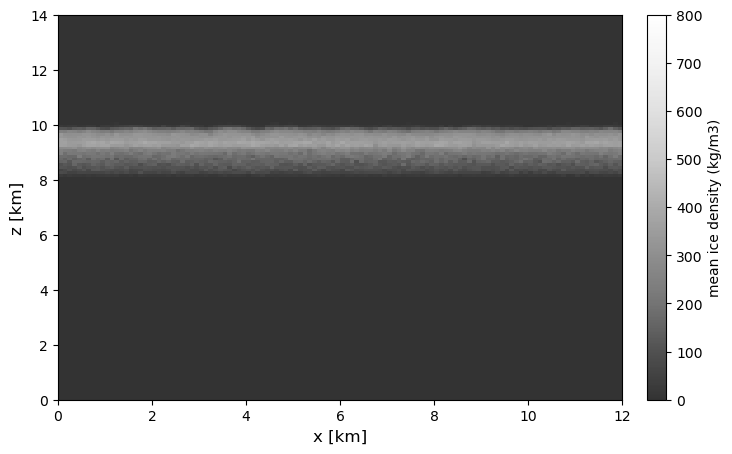

In [4]:
# initialize plot
fig, ax = plt.subplots(figsize=(8, 5))
da = ds_mean['out12']
im = plt.pcolormesh(ds.xh, ds.z, da[35, :, :], cmap='Greys_r', alpha=0.8)
im.set_clim(0, 800)
ax.set_xlabel('x [km]', fontsize=12)
ax.set_ylabel('z [km]', fontsize=12)
cbar = plt.colorbar(im, fraction=0.05, pad=0.04)
cbar.set_label('mean ice density (kg/m3)')

In [5]:
# create function that will be called by animation object
frames = 75
def animate(i):
    array = da[i, :, :].values
    im.set_array(array.flatten())
    seconds = da.time[i].values / np.timedelta64(1, 's')
    ax.set_title(f'mean ice density (kg/m3), {str(seconds)} seconds', fontsize=12)

In [6]:
# create animation object
ani = animation.FuncAnimation(fig, animate, frames, interval=150)

In [7]:
# display w/ Javascript
HTML(ani.to_jshtml())

## Mass mixing ratio

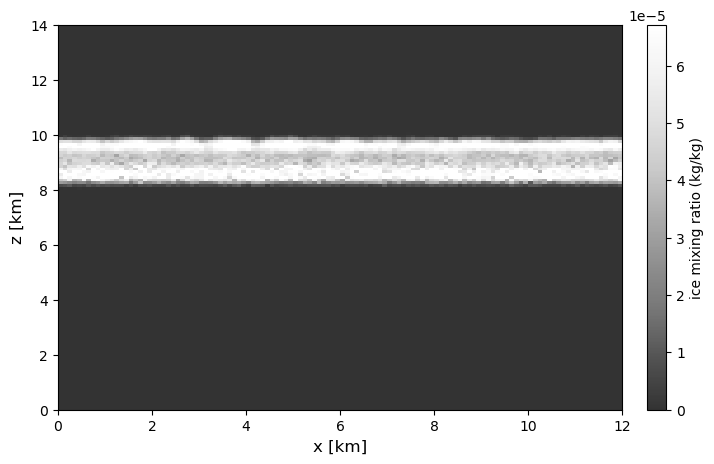

In [8]:
# initialize plot
fig, ax = plt.subplots(figsize=(8, 5))
da = ds_mean['qi']
im = plt.pcolormesh(ds.xh, ds.z, da[35, :, :], cmap='Greys_r', alpha=0.8)
qmax = 7.459537300746888e-05 # from bulk sims
im.set_clim(0, 0.9*qmax)
ax.set_xlabel('x [km]', fontsize=12)
ax.set_ylabel('z [km]', fontsize=12)
cbar = plt.colorbar(im, fraction=0.05, pad=0.04)
cbar.set_label('ice mixing ratio (kg/kg)')

In [9]:
# create function that will be called by animation object
frames = 75
def animate(i):
    array = da[i, :, :].values
    im.set_array(array.flatten())
    seconds = da.time[i].values / np.timedelta64(1, 's')
    ax.set_title(f'ice mixing ratio (kg/kg), {str(seconds)} seconds', fontsize=12)

In [10]:
# create animation object
ani = animation.FuncAnimation(fig, animate, frames, interval=150)
# display w/ Javascript
HTML(ani.to_jshtml())

In [19]:
ds_vert.xh

<xarray.DataArray 'xh' (ni: 120)>
array([ 0.05    ,  0.15    ,  0.25    ,  0.35    ,  0.45    ,  0.55    ,
        0.65    ,  0.75    ,  0.85    ,  0.95    ,  1.05    ,  1.15    ,
        1.25    ,  1.35    ,  1.45    ,  1.55    ,  1.65    ,  1.75    ,
        1.85    ,  1.95    ,  2.05    ,  2.15    ,  2.25    ,  2.35    ,
        2.45    ,  2.55    ,  2.65    ,  2.75    ,  2.85    ,  2.95    ,
        3.05    ,  3.15    ,  3.25    ,  3.35    ,  3.45    ,  3.55    ,
        3.65    ,  3.75    ,  3.85    ,  3.95    ,  4.05    ,  4.15    ,
        4.25    ,  4.35    ,  4.45    ,  4.55    ,  4.65    ,  4.75    ,
        4.85    ,  4.95    ,  5.05    ,  5.15    ,  5.25    ,  5.35    ,
        5.45    ,  5.55    ,  5.65    ,  5.75    ,  5.85    ,  5.95    ,
        6.05    ,  6.15    ,  6.25    ,  6.35    ,  6.45    ,  6.55    ,
        6.65    ,  6.75    ,  6.85    ,  6.95    ,  7.05    ,  7.150001,
        7.25    ,  7.35    ,  7.45    ,  7.55    ,  7.650001,  7.75    ,
        7.85    ,  7.95    ,  8.05    ,  8.150001,  8.25    ,  8.35    ,
        8.450001,  8.55    ,  8.650001,  8.75    ,  8.85    ,  8.950001,
        9.05    ,  9.150001,  9.25    ,  9.35    ,  9.450001,  9.55    ,
        9.650001,  9.75    ,  9.85    ,  9.950001, 10.05    , 10.150001,
       10.250001, 10.35    , 10.450001, 10.55    , 10.650001, 10.750001,
       10.85    , 10.950001, 11.05    , 11.150001, 11.250001, 11.35    ,
       11.450001, 11.55    , 11.650001, 11.750001, 11.85    , 11.950001],
      dtype=float32)
Dimensions without coordinates: ni
Attributes:
    long_name:  west-east location of scalar grid points
    units:      km